In [ ]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support

from sklearn.tree import export_text

import matplotlib.pyplot as plt

In [ ]:
RANDOM_STATE = 42

# Dataset 1 -  A dataset which is linearly separable

In [ ]:
# Dataset

# Positive instances

x1_1 = [1, 2, 3, 4, 5, 6, 7]
x2_1 = [x+3 for x in x1_1]
y_1  = [1 for x in x1_1]

x1_2 = [1, 2, 3, 4, 5]
x2_2 = [x+5 for x in x1_2]
y_2  = [1 for x in x1_2]

# Negative instances

x1_3 = [x+3 for x in x1_1]
x2_3 = [x-3 for x in x1_3]
y_3  = [0 for x in x1_3]

x1_4 = [x+5 for x in x1_2]
x2_4 = [x-5 for x in x1_4]
y_4  = [0 for x in x1_4]

x1 = np.array(x1_1 + x1_2 + x1_3 + x1_4)
x2 = np.array(x2_1 + x2_2 + x2_3 + x2_4)

X = np.array([x1,x2]).transpose()
y = np.array(y_1 + y_2 + y_3 + y_4)

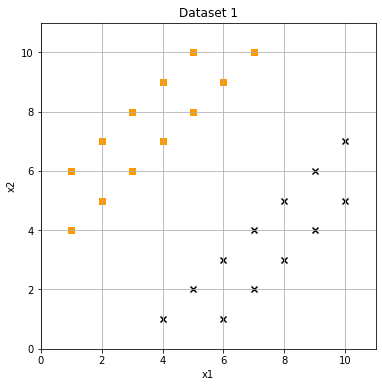

In [ ]:
# Plot dataset

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Dataset 1')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

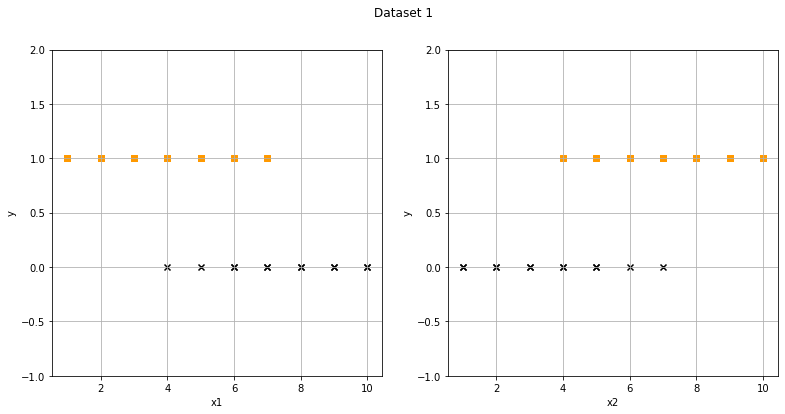

In [ ]:
# Plot target variable

fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(13,6))
plt.suptitle('Dataset 1')

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    ax[0].scatter(X[i,0], y[i], marker=marker_label[i], color=color_pred[i]) 
#ax[0].set_xlim([X.min()-1, X.max()+1])
ax[0].set_ylim([-1, +2])
ax[0].set_xlabel("x1")
ax[0].set_ylabel("y")
ax[0].grid(True)

for i in range(len(y)):   
    ax[1].scatter(X[i,1], y[i], marker=marker_label[i], color=color_pred[i]) 
#ax[1].set_xlim([X.min()-1, X.max()+1])
ax[1].set_ylim([-1, +2])
ax[1].set_xlabel("x2")
ax[1].set_ylabel("y")
ax[1].grid(True)

#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

In [ ]:
# ===========================================================================================
# Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# ===========================================================================================

lgc = LogisticRegression(fit_intercept=True, penalty='none', random_state=RANDOM_STATE)
lgc.fit(X, y)
y_pred = lgc.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for Logistic Regression Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_lg = list(lgc.intercept_) + list(lgc.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_lg):
  print(f'\t b_{i} = {c}')

Metrics for Logistic Regression Classifier: 
 	 accuracy: 1.0 
	 precision: 1.0 
	 recall: 1.0 
	 f1score: 1.0
Coeficients:
	 b_0 = -0.0011536598865481554
	 b_1 = -4.378278275431406
	 b_2 = 4.358146097093288


## Equação da Regressão Logística

![](https://saedsayad.com/images/LogReg_1.png)

**Fronteira entre as classes no espaço de instancias**

$\displaystyle p=0.5 \rightarrow e^{-(b_0 + b_1 x_1 + b_2 x_2)}=1$

$\displaystyle e^{-(b_0 + b_1 x_1 + b_2 x_2)}=1 \rightarrow b_0 + b_1 x_1 + b_2 x_2 = 0$

$\displaystyle b_0 + b_1 x_1 + b_2 x_2 = 0 \rightarrow x_2 = a_0 + a_1 x_1, \quad a_0=-\frac{b_0}{b_2}, \ a_1= -\frac{b_1}{b_2} $

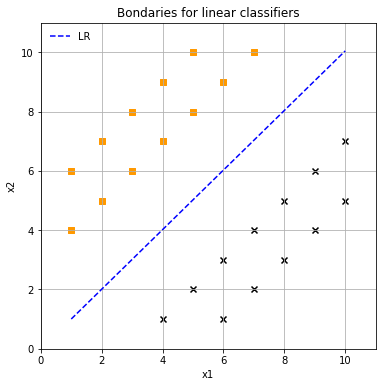

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')
ax.legend(['LR'], loc=2, framealpha=0)

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

## Ideia do Support-vector machine

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/800px-SVM_margin.png" alt="SVM" width="400"/>

In [ ]:
# ===========================================================================================
# Support Vector Machines Classifier
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
# ===========================================================================================

svm = SVC(kernel='linear', random_state=RANDOM_STATE)
svm.fit(X, y)
y_pred = svm.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for SVM Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_svm = list(svm.intercept_) + list(svm.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_svm):
  print(f'\t b_{i} = {c}')

Metrics for SVM Classifier: 
 	 accuracy: 1.0 
	 precision: 1.0 
	 recall: 1.0 
	 f1score: 1.0
Coeficients:
	 b_0 = 3.859462336962167e-05
	 b_1 = -0.33333111525153036
	 b_2 = 0.3333244610061219


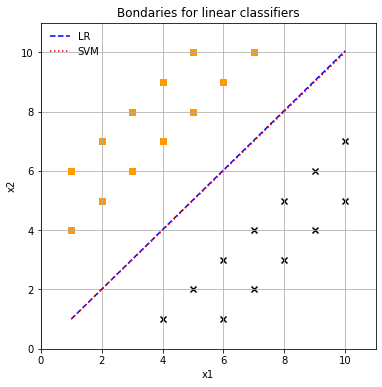

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

# 1. Logistic Regression

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')

# 2. SVM

a_0 = -coefs_svm[0]/coefs_svm[2]
a_1 = -coefs_svm[1]/coefs_svm[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'r:')
ax.legend(['LR', 'SVM'], loc=2, framealpha=0)

# 3. Train Data

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

# Dataset 2 -  A dataset which is linearly separable, but it's almost not

In [ ]:
# Dataset

# Positive instances

x1_1 = [1, 2, 3, 4, 5, 6, 7]
x2_1 = [x+3 for x in x1_1]
y_1  = [1 for x in x1_1]

x1_2 = [1, 2, 3, 4, 5]
x2_2 = [x+5 for x in x1_2]
y_2  = [1 for x in x1_2]

# Negative instances

x1_3 = [x+3 for x in x1_1]
x2_3 = [x-3 for x in x1_3]
y_3  = [0 for x in x1_3]

x1_4 = [x+5 for x in x1_2]
x2_4 = [x-5 for x in x1_4]
y_4  = [0 for x in x1_4]

x1 = np.array(x1_1 + x1_2 + x1_3 + x1_4 + [4])
x2 = np.array(x2_1 + x2_2 + x2_3 + x2_4 + [2])

X = np.array([x1,x2]).transpose()
y = np.array(y_1 + y_2 + y_3 + y_4 + [1])

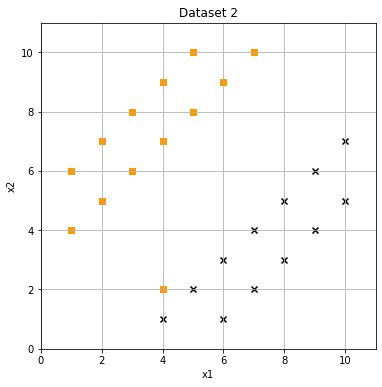

In [ ]:
# Plot dataset

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Dataset 2')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

In [ ]:
# ===========================================================================================
# Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# ===========================================================================================

lgc = LogisticRegression(fit_intercept=True, penalty='none', random_state=RANDOM_STATE)
lgc.fit(X, y)
y_pred = lgc.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for Logistic Regression Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_lg = list(lgc.intercept_) + list(lgc.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_lg):
  print(f'\t b_{i} = {c}')

Metrics for Logistic Regression Classifier: 
 	 accuracy: 1.0 
	 precision: 1.0 
	 recall: 1.0 
	 f1score: 1.0
Coeficients:
	 b_0 = 71.32801969479333
	 b_1 = -26.08599122803516
	 b_2 = 21.708176728851498


In [ ]:
# ===========================================================================================
# Support Vector Machines Classifier
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
# ===========================================================================================

svm = SVC(kernel='linear', random_state=RANDOM_STATE)
svm.fit(X, y)
y_pred = svm.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for SVM Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_svm = list(svm.intercept_) + list(svm.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_svm):
  print(f'\t b_{i} = {c}')

Metrics for SVM Classifier: 
 	 accuracy: 0.96 
	 precision: 1.0 
	 recall: 0.9230769230769231 
	 f1score: 0.9600000000000001
Coeficients:
	 b_0 = 0.49999999999999845
	 b_1 = -0.5
	 b_2 = 0.5


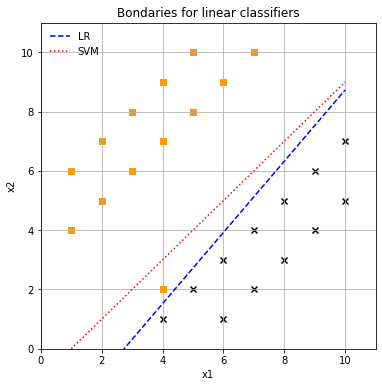

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

# 1. Logistic Regression

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')

# 2. SVM

a_0 = -coefs_svm[0]/coefs_svm[2]
a_1 = -coefs_svm[1]/coefs_svm[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'r:')
ax.legend(['LR', 'SVM'], loc=2, framealpha=0)

# 3. Train Data

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

# Dataset 3 -  A dataset which isn't linearly separable, but it almost is

In [ ]:
# Dataset

# Positive instances

x1_1 = [1, 2, 3, 4, 5, 6, 7]
x2_1 = [x+3 for x in x1_1]
y_1  = [1 for x in x1_1]

x1_2 = [1, 2, 3, 4, 5]
x2_2 = [x+5 for x in x1_2]
y_2  = [1 for x in x1_2]

# Negative instances

x1_3 = [x+3 for x in x1_1]
x2_3 = [x-3 for x in x1_3]
y_3  = [0 for x in x1_3]

x1_4 = [x+5 for x in x1_2]
x2_4 = [x-5 for x in x1_4]
y_4  = [0 for x in x1_4]

x1 = np.array(x1_1 + x1_2 + x1_3 + x1_4 + [4, 9])
x2 = np.array(x2_1 + x2_2 + x2_3 + x2_4 + [2, 5])

X = np.array([x1,x2]).transpose()
y = np.array(y_1 + y_2 + y_3 + y_4 + [1, 1])

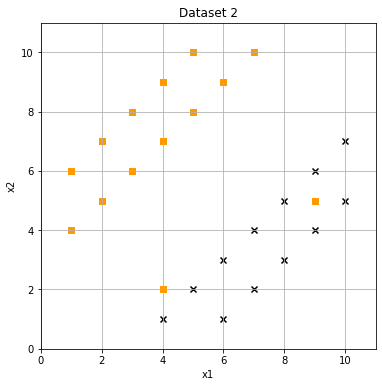

In [ ]:
# Plot dataset

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Dataset 2')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

In [ ]:
# ===========================================================================================
# Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# ===========================================================================================

lgc = LogisticRegression(fit_intercept=True, penalty='none', random_state=RANDOM_STATE)
lgc.fit(X, y)
y_pred = lgc.predict(X)

# The accuracy is the fraction of correctly classified samples
accuracy = accuracy_score(y, y_pred)

# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp 
# the number of false positives. The precision is intuitively the ability of the classifier 
# not to label as positive a sample that is negative.
precision = precision_score(y, y_pred)

# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the 
# number of false negatives. The recall is intuitively the ability of the classifier to find 
# all the positive samples.
recall = recall_score(y, y_pred)

# The F1 score can be interpreted as a harmonic mean of the precision and recall. The formula 
# for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)
f1score = f1_score(y, y_pred)

print('''Metrics for Logistic Regression Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_lg = list(lgc.intercept_) + list(lgc.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_lg):
  print(f'\t b_{i} = {c}')

Metrics for Logistic Regression Classifier: 
 	 accuracy: 0.9230769230769231 
	 precision: 1.0 
	 recall: 0.8571428571428571 
	 f1score: 0.923076923076923
Coeficients:
	 b_0 = 2.1511080003909377
	 b_1 = -1.18432821767378
	 b_2 = 1.1866986816311995


In [ ]:
# ===========================================================================================
# Support Vector Machines Classifier
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
# ===========================================================================================

svm = SVC(kernel='linear', random_state=RANDOM_STATE)
svm.fit(X, y)
y_pred = svm.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for SVM Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_svm = list(svm.intercept_) + list(svm.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_svm):
  print(f'\t b_{i} = {c}')

Metrics for SVM Classifier: 
 	 accuracy: 0.9230769230769231 
	 precision: 1.0 
	 recall: 0.8571428571428571 
	 f1score: 0.923076923076923
Coeficients:
	 b_0 = -6.827871601444713e-15
	 b_1 = -0.3333333333333339
	 b_2 = 0.3333333333333339


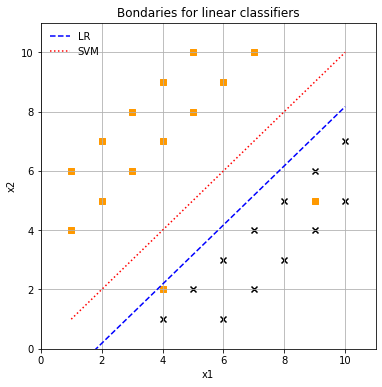

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

# 1. Logistic Regression

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')

# 2. SVM

a_0 = -coefs_svm[0]/coefs_svm[2]
a_1 = -coefs_svm[1]/coefs_svm[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'r:')
ax.legend(['LR', 'SVM'], loc=2, framealpha=0)

# 3. Train Data

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

# Dataset 4 - A dataset which isn't linearly separable

In [ ]:
# Dataset

# Positive instances

x1_1 = [1, 2, 3, 4, 5, 6, 7]
x2_1 = [x+3 for x in x1_1]
y_1  = [1 for x in x1_1]

x1_2 = [1, 2, 3, 4, 5]
x2_2 = [x+5 for x in x1_2]
y_2  = [1 for x in x1_2]

# Negative instances

x1_3 = [x+3 for x in x1_1]
x2_3 = [x-3 for x in x1_3]
y_3  = [0 for x in x1_3]

x1_4 = [x+5 for x in x1_2]
x2_4 = [x-5 for x in x1_4]
y_4  = [0 for x in x1_4]

x1 = np.array(x1_1 + x1_2 + x1_3 + x1_4 + [4, 6])
x2 = np.array(x2_1 + x2_2 + x2_3 + x2_4 + [2, 0])

X = np.array([x1,x2]).transpose()
y = np.array(y_1 + y_2 + y_3 + y_4 + [1, 1])

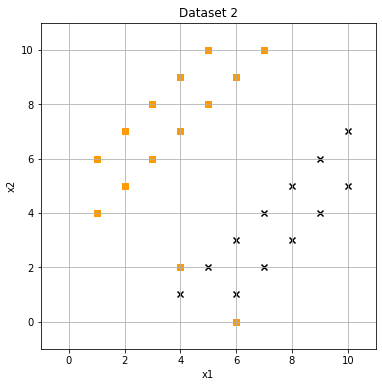

In [ ]:
# Plot dataset

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Dataset 2')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

In [ ]:
# ===========================================================================================
# Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# ===========================================================================================

lgc = LogisticRegression(fit_intercept=True, penalty='none', random_state=RANDOM_STATE)
lgc.fit(X, y)
y_pred = lgc.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for Logistic Regression Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_lg = list(lgc.intercept_) + list(lgc.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_lg):
  print(f'\t b_{i} = {c}')

Metrics for Logistic Regression Classifier: 
 	 accuracy: 0.9230769230769231 
	 precision: 0.9285714285714286 
	 recall: 0.9285714285714286 
	 f1score: 0.9285714285714286
Coeficients:
	 b_0 = 4.48095315078109
	 b_1 = -1.235277490163878
	 b_2 = 0.5935813178718877


In [ ]:
# ===========================================================================================
# Support Vector Machines Classifier
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
# ===========================================================================================

svm = SVC(kernel='linear', random_state=RANDOM_STATE)
svm.fit(X, y)
y_pred = svm.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for SVM Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_svm = list(svm.intercept_) + list(svm.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_svm):
  print(f'\t b_{i} = {c}')

Metrics for SVM Classifier: 
 	 accuracy: 0.9230769230769231 
	 precision: 1.0 
	 recall: 0.8571428571428571 
	 f1score: 0.923076923076923
Coeficients:
	 b_0 = 7.679042586990666e-16
	 b_1 = -0.3333333333333357
	 b_2 = 0.3333333333333335


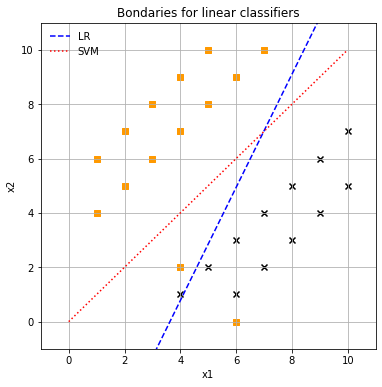

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

# 1. Logistic Regression

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')

# 2. SVM

a_0 = -coefs_svm[0]/coefs_svm[2]
a_1 = -coefs_svm[1]/coefs_svm[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'r:')
ax.legend(['LR', 'SVM'], loc=2, framealpha=0)

# 3. Train Data

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

# Dataset 5 - A dataset which isn't linearly separable, including an outlier

In [ ]:
# Dataset

# Positive instances

x1_1 = [1, 2, 3, 4, 5, 6, 7]
x2_1 = [x+3 for x in x1_1]
y_1  = [1 for x in x1_1]

x1_2 = [1, 2, 3, 4, 5]
x2_2 = [x+5 for x in x1_2]
y_2  = [1 for x in x1_2]

# Negative instances

x1_3 = [x+3 for x in x1_1]
x2_3 = [x-3 for x in x1_3]
y_3  = [0 for x in x1_3]

x1_4 = [x+5 for x in x1_2]
x2_4 = [x-5 for x in x1_4]
y_4  = [0 for x in x1_4]

x1 = np.array(x1_1 + x1_2 + x1_3 + x1_4 + [4, 10])
x2 = np.array(x2_1 + x2_2 + x2_3 + x2_4 + [2, -8])

X = np.array([x1,x2]).transpose()
y = np.array(y_1 + y_2 + y_3 + y_4 + [1, 1])

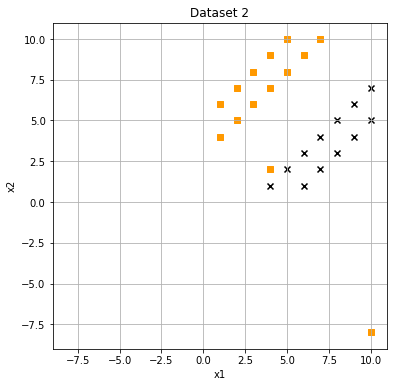

In [ ]:
# Plot dataset

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Dataset 2')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

In [ ]:
# ===========================================================================================
# Logistic Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# ===========================================================================================

lgc = LogisticRegression(fit_intercept=True, penalty='none', random_state=RANDOM_STATE)
lgc.fit(X, y)
y_pred = lgc.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for Logistic Regression Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_lg = list(lgc.intercept_) + list(lgc.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_lg):
  print(f'\t b_{i} = {c}')

Metrics for Logistic Regression Classifier: 
 	 accuracy: 0.8846153846153846 
	 precision: 0.8666666666666667 
	 recall: 0.9285714285714286 
	 f1score: 0.896551724137931
Coeficients:
	 b_0 = 2.815705536844609
	 b_1 = -0.6172759494619204
	 b_2 = 0.1737135777228152


In [ ]:
# ===========================================================================================
# Support Vector Machines Classifier
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
# ===========================================================================================

svm = SVC(kernel='linear', random_state=RANDOM_STATE)
svm.fit(X, y)
y_pred = svm.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for SVM Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_svm = list(svm.intercept_) + list(svm.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_svm):
  print(f'\t b_{i} = {c}')

Metrics for SVM Classifier: 
 	 accuracy: 0.9230769230769231 
	 precision: 1.0 
	 recall: 0.8571428571428571 
	 f1score: 0.923076923076923
Coeficients:
	 b_0 = 3.117876327488981e-15
	 b_1 = -0.3333333333333357
	 b_2 = 0.33333333333333215


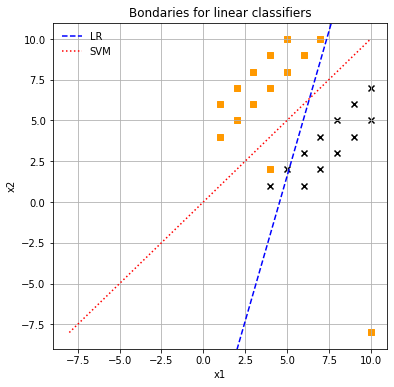

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

# 1. Logistic Regression

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')

# 2. SVM

a_0 = -coefs_svm[0]/coefs_svm[2]
a_1 = -coefs_svm[1]/coefs_svm[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'r:')
ax.legend(['LR', 'SVM'], loc=2, framealpha=0)

# 3. Train Data

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

In [ ]:
# ===========================================================================================
# Support Vector Machines Classifier
# https://scikit-learn.org/stable/modules/svm.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC
# ===========================================================================================

C=0.003
svm = SVC(kernel='linear', C=C, random_state=RANDOM_STATE)
svm.fit(X, y)
y_pred = svm.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for SVM Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

coefs_svm = list(svm.intercept_) + list(svm.coef_[0])
print('Coeficients:')
for i, c in enumerate(coefs_svm):
  print(f'\t b_{i} = {c}')

Metrics for SVM Classifier: 
 	 accuracy: 0.5 
	 precision: 0.52 
	 recall: 0.9285714285714286 
	 f1score: 0.6666666666666666
Coeficients:
	 b_0 = 0.6549999999999999
	 b_1 = -0.10500000000000002
	 b_2 = 0.081


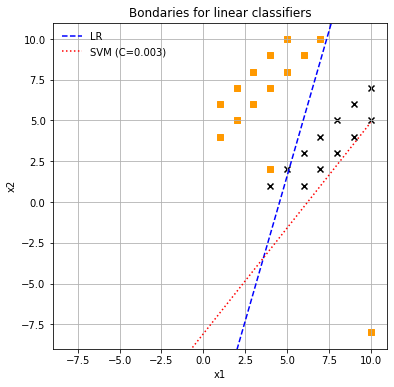

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

# 1. Logistic Regression

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')

# 2. SVM

a_0 = -coefs_svm[0]/coefs_svm[2]
a_1 = -coefs_svm[1]/coefs_svm[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'r:')
ax.legend(['LR', f'SVM (C={C})'], loc=2, framealpha=0)

# 3. Train Data

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

In [ ]:
# ===========================================================================================
# Decision Tree Classifier
# https://scikit-learn.org/stable/modules/tree.html#tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# ===========================================================================================

max_depth = 2
min_samples_split = 2
dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion='entropy', random_state=RANDOM_STATE)
dtc.fit(X, y)
y_pred = dtc.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for Decision Tree Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

r = export_text(dtc, feature_names=['x1', 'x2'])
print(r)

Metrics for Decision Tree Classifier: 
 	 accuracy: 0.9230769230769231 
	 precision: 1.0 
	 recall: 0.8571428571428571 
	 f1score: 0.923076923076923
|--- x1 <= 5.50
|   |--- x2 <= 3.00
|   |   |--- class: 0
|   |--- x2 >  3.00
|   |   |--- class: 1
|--- x1 >  5.50
|   |--- x2 <= 8.00
|   |   |--- class: 0
|   |--- x2 >  8.00
|   |   |--- class: 1



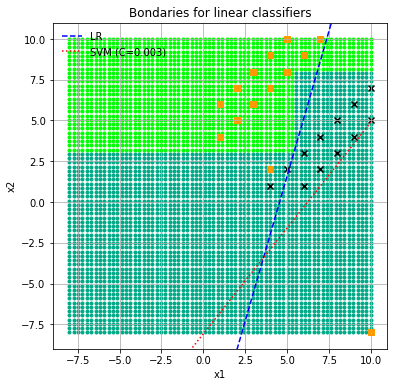

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

# 1. Logistic Regression

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')

# 2. SVM

a_0 = -coefs_svm[0]/coefs_svm[2]
a_1 = -coefs_svm[1]/coefs_svm[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'r:')
ax.legend(['LR', f'SVM (C={C})'], loc=2, framealpha=0)

# 2. DTC

x_grid  = np.linspace(X.min(), X.max(), 70)
x1_plot = []
x2_plot = []
for x1 in x_grid:
  for x2 in x_grid:
    x1_plot.append(x1)
    x2_plot.append(x2)

x1_plot = np.array(x1_plot)
x2_plot = np.array(x2_plot)
X_plot = np.array([x1_plot, x2_plot]).transpose()
y_plot = dtc.predict(X_plot)

markers = ['.', '.']
marker_label = [markers[i] for i in y_plot]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0.4, 0.6, len(np.unique(y_plot)))]
color_pred = [colors[i] for i in y_plot]

for i in range(len(y_plot)):   
    plt.scatter(X_plot[i,0], X_plot[i,1], marker=marker_label[i], color=color_pred[i]) 

# 3. Train Data

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)

In [ ]:
# ===========================================================================================
# Decision Tree Classifier
# https://scikit-learn.org/stable/modules/tree.html#tree
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# ===========================================================================================

max_depth = 10
min_samples_split = 2
dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, criterion='entropy', random_state=RANDOM_STATE)
dtc.fit(X, y)
y_pred = dtc.predict(X)

accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1score = f1_score(y, y_pred)
print('''Metrics for Decision Tree Classifier: ''' + 
      '''\n \t accuracy: {} \n\t precision: {} \n\t recall: {} \n\t f1score: {}''' 
      .format(accuracy, precision, recall, f1score))

r = export_text(dtc, feature_names=['x1', 'x2'])
print(r)

Metrics for Decision Tree Classifier: 
 	 accuracy: 1.0 
	 precision: 1.0 
	 recall: 1.0 
	 f1score: 1.0
|--- x1 <= 5.50
|   |--- x2 <= 3.00
|   |   |--- x2 <= 1.50
|   |   |   |--- class: 0
|   |   |--- x2 >  1.50
|   |   |   |--- x1 <= 4.50
|   |   |   |   |--- class: 1
|   |   |   |--- x1 >  4.50
|   |   |   |   |--- class: 0
|   |--- x2 >  3.00
|   |   |--- class: 1
|--- x1 >  5.50
|   |--- x2 <= 8.00
|   |   |--- x2 <= -3.50
|   |   |   |--- class: 1
|   |   |--- x2 >  -3.50
|   |   |   |--- class: 0
|   |--- x2 >  8.00
|   |   |--- class: 1



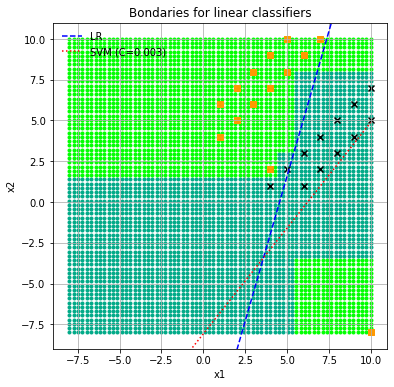

In [ ]:
# Computing and ploting the bondary between x1 and x2

fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(6,6))
plt.title('Bondaries for linear classifiers')
plt.xlim([X.min()-1, X.max()+1])
plt.ylim([X.min()-1, X.max()+1])

# 1. Logistic Regression

a_0 = -coefs_lg[0]/coefs_lg[2]
a_1 = -coefs_lg[1]/coefs_lg[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'b--')

# 2. SVM

a_0 = -coefs_svm[0]/coefs_svm[2]
a_1 = -coefs_svm[1]/coefs_svm[2]

x_bound = np.linspace(X.min(), X.max(), 10)
y_bound = [a_0 + a_1*x for x in x_bound]

plt.plot(x_bound, y_bound, 'r:')
ax.legend(['LR', f'SVM (C={C})'], loc=2, framealpha=0)

# 2. DTC

x_grid  = np.linspace(X.min(), X.max(), 70)
x1_plot = []
x2_plot = []
for x1 in x_grid:
  for x2 in x_grid:
    x1_plot.append(x1)
    x2_plot.append(x2)

x1_plot = np.array(x1_plot)
x2_plot = np.array(x2_plot)
X_plot = np.array([x1_plot, x2_plot]).transpose()
y_plot = dtc.predict(X_plot)

markers = ['.', '.']
marker_label = [markers[i] for i in y_plot]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0.4, 0.6, len(np.unique(y_plot)))]
color_pred = [colors[i] for i in y_plot]

for i in range(len(y_plot)):   
    plt.scatter(X_plot[i,0], X_plot[i,1], marker=marker_label[i], color=color_pred[i]) 

# 3. Train Data

markers = ['x', 's']
marker_label = [markers[i] for i in y]
colors = [plt.cm.nipy_spectral(each) for each in np.linspace(0, 0.8, len(np.unique(y)))]
color_pred = [colors[i] for i in y]

for i in range(len(y)):   
    plt.scatter(X[i,0], X[i,1], marker=marker_label[i], color=color_pred[i]) 

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.grid(True)
#fig.savefig(fig_name, bbox_inches='tight', dpi=600)